<a href="https://colab.research.google.com/github/faiyazansari566/Projects-practice/blob/main/Wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries and loading the dataset

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsClassifier
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [5]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
## exploratory data analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [15]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

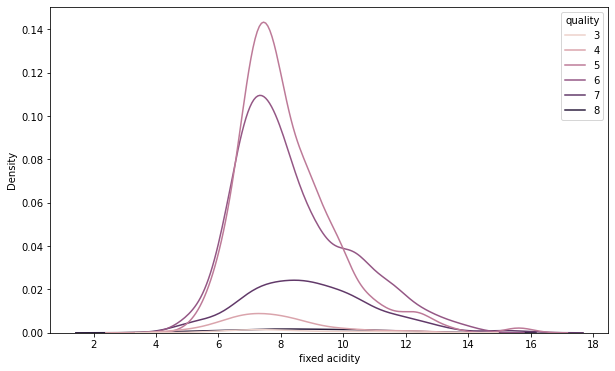

In [17]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['fixed acidity'],hue=df['quality'])
#Fixed Activity data follows the normal distribution

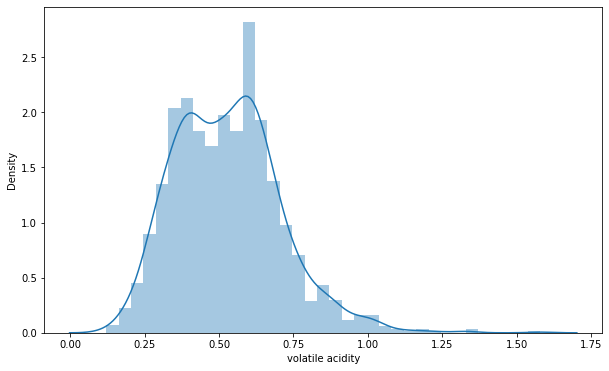

In [20]:
plt.figure(figsize=(10,6))
sns.distplot(df['volatile acidity'])
## volatile acidity follows normal distribution

In [21]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [22]:
#Observations:

#Fixed acidity falls in same range for all quality level.
#Lower the volatile acidity level, higher the quality of wine.
#Higher the citric acid level, higher the quality of wine
#There is no significant difference in residual sugar value between different quality levels.
#Lower the chlorides level, higher the quality level of wine.
#There is relationship between free sulfur dioxide and total sulfur dioxide.
#Lower the pH value, higher the quality level of wine.
#Higher the sulphates level, quality level of wine increases.
#Alochol values falls in same range for all alcohol quality level

In [23]:
corr = df.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


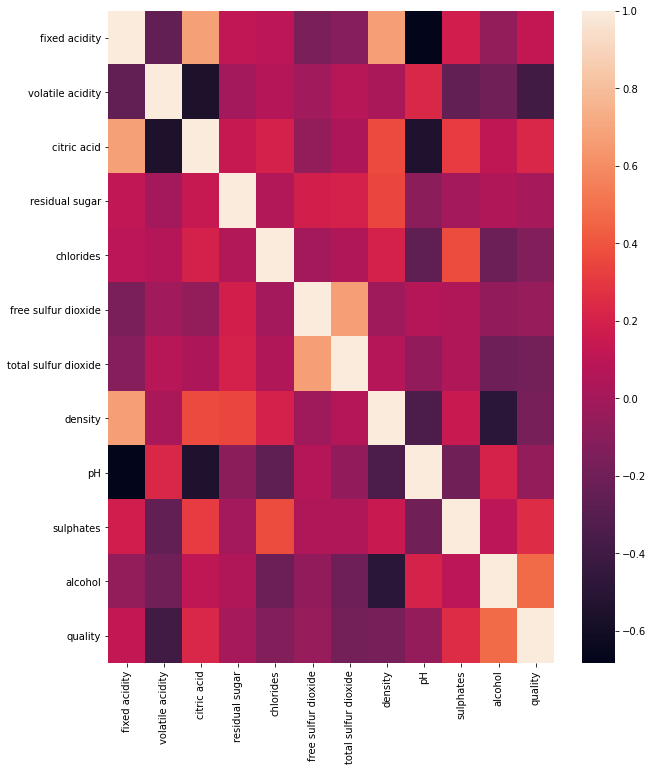

In [24]:
plt.figure(figsize=(10,12))
sns.heatmap(df.corr())

In [25]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [36]:
correlation(df,0.7)  ##There is collinearity between multiple independent variable

set()

In [37]:
sc = StandardScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df.drop('quality',axis=1)),columns=df.columns[:-1])
df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [38]:
## modelling

In [40]:
x_train, x_test, y_train, y_test = train_test_split(df_scaled, df['quality'], test_size=0.3, random_state=100)

In [45]:
def metrics(y_true, y_pred):
    print('Confusion Matrix:\n', confusion_matrix(y_true, y_pred))
    print('\n\nAccuracy Score:\n', accuracy_score(y_true, y_pred))
    print('\n\nClassification Report: \n', classification_report(y_true, y_pred))


def predictions(model,x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test):
        model.fit(x_train, y_train)
        #predictions
        train_pred = model.predict(x_train)
        test_pred = model.predict(x_test)
        actual = [y_train, y_test]
        pred = [train_pred, test_pred]
        for i in range(0,2):
            if i==0:
                print('----Train Metrics----')
            else:
                print('----Test Metrics----')
            metrics(actual[i], pred[i])

In [46]:
## logistic regression

In [49]:
lg = LogisticRegression(multi_class='ovr')

In [50]:
predictions(lg)

----Train Metrics----
Confusion Matrix:
 [[  1   1   4   1   0   0]
 [  0   1  21  14   0   0]
 [  0   0 377 100   0   0]
 [  0   0 164 268  13   0]
 [  0   0  10  96  34   0]
 [  0   0   0   8   6   0]]


Accuracy Score:
 0.6085790884718498


Classification Report: 
               precision    recall  f1-score   support

           3       1.00      0.14      0.25         7
           4       0.50      0.03      0.05        36
           5       0.65      0.79      0.72       477
           6       0.55      0.60      0.58       445
           7       0.64      0.24      0.35       140
           8       0.00      0.00      0.00        14

    accuracy                           0.61      1119
   macro avg       0.56      0.30      0.32      1119
weighted avg       0.60      0.61      0.58      1119

----Test Metrics----
Confusion Matrix:
 [[  0   0   3   0   0   0]
 [  0   0  10   5   2   0]
 [  0   0 151  51   2   0]
 [  0   0  58 125  10   0]
 [  0   0   3  43  13   0]
 [  0   0   0

In [51]:
knn = KNeighborsClassifier()

In [53]:
predictions(knn)

----Train Metrics----
Confusion Matrix:
 [[  3   0   2   2   0   0]
 [  0   2  22  12   0   0]
 [  2   3 386  80   5   1]
 [  0   2 126 293  23   1]
 [  0   0  18  52  69   1]
 [  0   0   0   8   4   2]]


Accuracy Score:
 0.6747095621090259


Classification Report: 
               precision    recall  f1-score   support

           3       0.60      0.43      0.50         7
           4       0.29      0.06      0.09        36
           5       0.70      0.81      0.75       477
           6       0.66      0.66      0.66       445
           7       0.68      0.49      0.57       140
           8       0.40      0.14      0.21        14

    accuracy                           0.67      1119
   macro avg       0.55      0.43      0.46      1119
weighted avg       0.66      0.67      0.66      1119

----Test Metrics----
Confusion Matrix:
 [[  0   0   2   1   0   0]
 [  0   1  10   5   1   0]
 [  0   2 143  52   7   0]
 [  0   2  61 106  24   0]
 [  0   2   8  24  25   0]
 [  0   0   1

In [98]:
nb = GaussianNB()
predictions(nb)

----Train Metrics----
Confusion Matrix:
 [[  3   1   2   1   0   0]
 [  1   6  19  10   0   0]
 [  3  20 322 113  19   0]
 [  0  12 135 216  77   5]
 [  0   1   8  44  82   5]
 [  0   0   0   1  10   3]]


Accuracy Score:
 0.5647899910634495


Classification Report: 
               precision    recall  f1-score   support

           3       0.43      0.43      0.43         7
           4       0.15      0.17      0.16        36
           5       0.66      0.68      0.67       477
           6       0.56      0.49      0.52       445
           7       0.44      0.59      0.50       140
           8       0.23      0.21      0.22        14

    accuracy                           0.56      1119
   macro avg       0.41      0.43      0.42      1119
weighted avg       0.57      0.56      0.57      1119

----Test Metrics----
Confusion Matrix:
 [[  0   0   3   0   0   0]
 [  0   1   8   8   0   0]
 [  1   5 140  49   9   0]
 [  0   4  55  80  51   3]
 [  0   0   3  21  33   2]
 [  0   0   0

In [99]:
dtree = DecisionTreeClassifier()
predictions(dtree)


----Train Metrics----
Confusion Matrix:
 [[  7   0   0   0   0   0]
 [  0  36   0   0   0   0]
 [  0   0 477   0   0   0]
 [  0   0   0 445   0   0]
 [  0   0   0   0 140   0]
 [  0   0   0   0   0  14]]


Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00       477
           6       1.00      1.00      1.00       445
           7       1.00      1.00      1.00       140
           8       1.00      1.00      1.00        14

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119

----Test Metrics----
Confusion Matrix:
 [[  0   1   1   1   0   0]
 [  1   2   9   4   1   0]
 [  0   7 141  41  15   0]
 [  0   4  47 120  17   5]
 [  0   4   6  20  29   0]
 [  0   0   0   2   2   0]]


In [100]:
bag = BaggingClassifier()
predictions(bag)

----Train Metrics----
Confusion Matrix:
 [[  7   0   0   0   0   0]
 [  0  32   2   2   0   0]
 [  0   0 477   0   0   0]
 [  0   0  12 433   0   0]
 [  0   0   0   2 138   0]
 [  0   0   0   0   1  13]]


Accuracy Score:
 0.9830205540661304


Classification Report: 
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         7
           4       1.00      0.89      0.94        36
           5       0.97      1.00      0.99       477
           6       0.99      0.97      0.98       445
           7       0.99      0.99      0.99       140
           8       1.00      0.93      0.96        14

    accuracy                           0.98      1119
   macro avg       0.99      0.96      0.98      1119
weighted avg       0.98      0.98      0.98      1119

----Test Metrics----
Confusion Matrix:
 [[  0   0   2   1   0   0]
 [  0   0  13   3   1   0]
 [  0   0 161  40   3   0]
 [  0   2  52 113  26   0]
 [  0   0   2  24  33   0]
 [  0   0   0

In [101]:
rf = RandomForestClassifier()
predictions(rf)

----Train Metrics----
Confusion Matrix:
 [[  7   0   0   0   0   0]
 [  0  36   0   0   0   0]
 [  0   0 477   0   0   0]
 [  0   0   0 445   0   0]
 [  0   0   0   0 140   0]
 [  0   0   0   0   0  14]]


Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00       477
           6       1.00      1.00      1.00       445
           7       1.00      1.00      1.00       140
           8       1.00      1.00      1.00        14

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119

----Test Metrics----
Confusion Matrix:
 [[  0   0   2   1   0   0]
 [  0   0  11   5   1   0]
 [  0   0 162  38   4   0]
 [  0   0  39 140  14   0]
 [  0   0   1  27  31   0]
 [  0   0   0   1   3   0]]


In [102]:
gb = GradientBoostingClassifier()
predictions(gb)

----Train Metrics----
Confusion Matrix:
 [[  7   0   0   0   0   0]
 [  0  31   3   2   0   0]
 [  0   0 441  35   1   0]
 [  0   0  40 405   0   0]
 [  0   0   3  15 122   0]
 [  0   0   0   0   0  14]]


Accuracy Score:
 0.9115281501340483


Classification Report: 
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         7
           4       1.00      0.86      0.93        36
           5       0.91      0.92      0.91       477
           6       0.89      0.91      0.90       445
           7       0.99      0.87      0.93       140
           8       1.00      1.00      1.00        14

    accuracy                           0.91      1119
   macro avg       0.96      0.93      0.94      1119
weighted avg       0.91      0.91      0.91      1119

----Test Metrics----
Confusion Matrix:
 [[  0   0   2   1   0   0]
 [  1   0   8   7   1   0]
 [  0   1 159  40   3   1]
 [  0   1  46 127  18   1]
 [  1   0   3  21  34   0]
 [  0   0   0

In [103]:
xgb = XGBClassifier()
predictions(xgb)

----Train Metrics----
Confusion Matrix:
 [[  7   0   0   0   0   0]
 [  0  14  15   7   0   0]
 [  0   0 423  53   1   0]
 [  0   0  67 367  11   0]
 [  0   0   6  27 107   0]
 [  0   0   0   1   3  10]]


Accuracy Score:
 0.8293118856121537


Classification Report: 
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         7
           4       1.00      0.39      0.56        36
           5       0.83      0.89      0.86       477
           6       0.81      0.82      0.82       445
           7       0.88      0.76      0.82       140
           8       1.00      0.71      0.83        14

    accuracy                           0.83      1119
   macro avg       0.92      0.76      0.81      1119
weighted avg       0.83      0.83      0.83      1119

----Test Metrics----
Confusion Matrix:
 [[  0   0   2   1   0   0]
 [  0   0   9   7   1   0]
 [  1   1 157  42   3   0]
 [  1   0  43 129  20   0]
 [  0   0   2  26  31   0]
 [  0   0   0

In [104]:
lgbm = LGBMClassifier()
predictions(lgbm)

----Train Metrics----
Confusion Matrix:
 [[  7   0   0   0   0   0]
 [  0  36   0   0   0   0]
 [  0   0 477   0   0   0]
 [  0   0   0 445   0   0]
 [  0   0   0   0 140   0]
 [  0   0   0   0   0  14]]


Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00       477
           6       1.00      1.00      1.00       445
           7       1.00      1.00      1.00       140
           8       1.00      1.00      1.00        14

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119

----Test Metrics----
Confusion Matrix:
 [[  0   0   2   1   0   0]
 [  0   0  11   5   1   0]
 [  0   0 156  45   3   0]
 [  0   1  50 126  15   1]
 [  0   0   2  21  36   0]
 [  0   0   0   1   3   0]]


In [105]:
params = {'n_estimators':np.arange(80,120,2),
          'criterion' : ["gini", "entropy"],
          'min_samples_split': np.arange(1,10,2),
          'min_samples_leaf':np.arange(1,10,2)}

In [106]:
from sklearn.model_selection import GridSearchCV
gcv = GridSearchCV(estimator=rf,param_grid=params , n_jobs=-1)
gcv.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=No...
                                              random_state=None, verbose=0,
                                   

In [107]:
gcv.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 84}

In [108]:
rfc_tuned_model = RandomForestClassifier(criterion='entropy',min_samples_leaf= 3,min_samples_split= 5,n_estimators= 84)  

In [109]:
rfc_tuned_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=84,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [115]:
y_pred = rfc_tuned_model.predict(x_test)

In [116]:
print(accuracy_score(y_test,y_pred))

0.6708333333333333


In [139]:
df2 = df.copy()

In [140]:
##df2.quality.value_counts()

In [141]:
#df2.quality.replace(3,'bad',inplace=True)
#df2.quality.replace(4,'bad',inplace=True)
#df2.quality.replace(5,'bad',inplace=True)
#df2.quality.replace(6,'bad',inplace=True)
#df2.quality.replace(7,'good',inplace=True)
#df2.quality.replace(8,'good',inplace=True)




In [142]:
df2['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [143]:
df2.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [144]:
col = df2.columns.values

In [145]:
for i in range(len(col)-1):
    df2[col[i]]=np.log1p(df2[col[i]])

In [146]:
df2.skew()

fixed acidity           0.455743
volatile acidity        0.270168
citric acid             0.087506
residual sugar          2.255076
chlorides               5.071476
free sulfur dioxide    -0.097399
total sulfur dioxide   -0.035746
density                 0.067142
pH                      0.048331
sulphates               1.610497
alcohol                 0.677798
quality                 0.217802
dtype: float64

In [147]:
df2['residual sugar'] = np.sqrt(df2['residual sugar'])
df2['chlorides'] = np.sqrt(df2['chlorides'])
df2['sulphates'] = np.sqrt(df2['sulphates'])


In [148]:
df2.skew()

fixed acidity           0.455743
volatile acidity        0.270168
citric acid             0.087506
residual sugar          1.748459
chlorides               3.332369
free sulfur dioxide    -0.097399
total sulfur dioxide   -0.035746
density                 0.067142
pH                      0.048331
sulphates               1.122806
alcohol                 0.677798
quality                 0.217802
dtype: float64

In [149]:
df2['residual sugar']=np.cbrt(df2['residual sugar'])
df2['chlorides']=np.cbrt(df2['chlorides'])
df2['sulphates']=np.cbrt(df2['sulphates'])

In [150]:
df2.skew()

fixed acidity           0.455743
volatile acidity        0.270168
citric acid             0.087506
residual sugar          1.433026
chlorides               2.157831
free sulfur dioxide    -0.097399
total sulfur dioxide   -0.035746
density                 0.067142
pH                      0.048331
sulphates               0.845788
alcohol                 0.677798
quality                 0.217802
dtype: float64

In [151]:
# exp=(1/10)
# wine['residual sugar']=np.power(wine['residual sugar'], exp)
# wine['chlorides']=np.power(wine['chlorides'], exp)
# wine['alcohol']=np.power(wine['alcohol'], exp)
# wine['sulphates']=np.power(wine['sulphates'], exp)

#exp can be used further to remove skewness

In [152]:
from scipy.stats import zscore
z=np.abs(zscore(df2))
df3=df2[(z<3).all(axis=1)]
print(df2.shape)
print(df3.shape)

(1599, 12)
(1483, 12)


In [153]:
##outliers are removed

In [154]:
sc = StandardScaler()
df2_scaled = pd.DataFrame(sc.fit_transform(df2.drop('quality',axis=1)),columns=df2.columns[:-1])
df2_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.492070,0.987514,-1.497274,-0.596380,-0.229911,-0.247127,-0.116363,0.558618,1.279504,-0.603391,-0.991666
1,-0.230786,1.863512,-1.497274,0.345438,0.531683,0.992765,0.856963,0.028734,-0.712539,0.275091,-0.574211
2,-0.230786,1.289416,-1.239878,-0.016328,0.340250,0.214202,0.546021,0.134732,-0.315750,0.071627,-0.574211
3,1.604062,-1.482395,1.421087,-0.596380,-0.268942,0.403079,0.697760,0.664563,-0.980227,-0.444101,-0.574211
4,-0.492070,0.987514,-1.497274,-0.596380,-0.229911,-0.247127,-0.116363,0.558618,1.279504,-0.603391,-0.991666


In [156]:
x2 = df2_scaled
y2 = df2['quality']

In [157]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size=0.3, random_state=100)

In [158]:
def metrics(y_true, y_pred):
    print('Confusion Matrix:\n', confusion_matrix(y_true, y_pred))
    print('\n\nAccuracy Score:\n', accuracy_score(y_true, y_pred))
    print('\n\nClassification Report: \n', classification_report(y_true, y_pred))


def predictions(model,x_train=x2_train, x_test=x2_test, y_train=y2_train, y_test=y2_test):
        model.fit(x_train, y_train)
        #predictions
        train_pred = model.predict(x_train)
        test_pred = model.predict(x_test)
        actual = [y_train, y_test]
        pred = [train_pred, test_pred]
        for i in range(0,2):
            if i==0:
                print('----Train Metrics----')
            else:
                print('----Test Metrics----')
            metrics(actual[i], pred[i])

In [159]:
predictions(lg)

----Train Metrics----
Confusion Matrix:
 [[  1   1   3   2   0   0]
 [  0   1  22  13   0   0]
 [  0   0 382  94   1   0]
 [  0   0 161 268  16   0]
 [  0   0   9  97  34   0]
 [  0   0   0  10   4   0]]


Accuracy Score:
 0.613047363717605


Classification Report: 
               precision    recall  f1-score   support

           3       1.00      0.14      0.25         7
           4       0.50      0.03      0.05        36
           5       0.66      0.80      0.72       477
           6       0.55      0.60      0.58       445
           7       0.62      0.24      0.35       140
           8       0.00      0.00      0.00        14

    accuracy                           0.61      1119
   macro avg       0.56      0.30      0.33      1119
weighted avg       0.60      0.61      0.59      1119

----Test Metrics----
Confusion Matrix:
 [[  0   0   2   1   0   0]
 [  0   0  12   4   1   0]
 [  0   0 154  49   1   0]
 [  0   0  62 120  11   0]
 [  0   0   2  45  12   0]
 [  0   0   0 

In [160]:
predictions(knn)

----Train Metrics----
Confusion Matrix:
 [[  2   0   5   0   0   0]
 [  0   5  22   9   0   0]
 [  0   4 399  70   4   0]
 [  0   4 115 305  21   0]
 [  0   0  15  46  79   0]
 [  0   0   0   8   6   0]]


Accuracy Score:
 0.7059874888293118


Classification Report: 
               precision    recall  f1-score   support

           3       1.00      0.29      0.44         7
           4       0.38      0.14      0.20        36
           5       0.72      0.84      0.77       477
           6       0.70      0.69      0.69       445
           7       0.72      0.56      0.63       140
           8       0.00      0.00      0.00        14

    accuracy                           0.71      1119
   macro avg       0.59      0.42      0.46      1119
weighted avg       0.69      0.71      0.69      1119

----Test Metrics----
Confusion Matrix:
 [[  0   1   1   1   0   0]
 [  0   0  12   4   1   0]
 [  0   2 143  51   8   0]
 [  0   2  62 106  23   0]
 [  0   0  10  20  29   0]
 [  0   0   0

In [161]:
predictions(nb)

----Train Metrics----
Confusion Matrix:
 [[  3   1   2   1   0   0]
 [  1   7  19   9   0   0]
 [  3  13 358  86  17   0]
 [  0  10 155 210  67   3]
 [  0   2   9  42  87   0]
 [  0   0   0   2  10   2]]


Accuracy Score:
 0.5960679177837355


Classification Report: 
               precision    recall  f1-score   support

           3       0.43      0.43      0.43         7
           4       0.21      0.19      0.20        36
           5       0.66      0.75      0.70       477
           6       0.60      0.47      0.53       445
           7       0.48      0.62      0.54       140
           8       0.40      0.14      0.21        14

    accuracy                           0.60      1119
   macro avg       0.46      0.43      0.44      1119
weighted avg       0.59      0.60      0.59      1119

----Test Metrics----
Confusion Matrix:
 [[  0   0   3   0   0   0]
 [  0   3   8   4   2   0]
 [  0   6 141  49   8   0]
 [  0   1  70  76  45   1]
 [  0   1   2  21  34   1]
 [  0   0   0

In [162]:
predictions(dtree)

----Train Metrics----
Confusion Matrix:
 [[  7   0   0   0   0   0]
 [  0  36   0   0   0   0]
 [  0   0 477   0   0   0]
 [  0   0   0 445   0   0]
 [  0   0   0   0 140   0]
 [  0   0   0   0   0  14]]


Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00       477
           6       1.00      1.00      1.00       445
           7       1.00      1.00      1.00       140
           8       1.00      1.00      1.00        14

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119

----Test Metrics----
Confusion Matrix:
 [[  0   1   1   1   0   0]
 [  1   1   9   4   2   0]
 [  0   9 135  41  19   0]
 [  0   3  55 113  21   1]
 [  0   4   4  18  32   1]
 [  0   0   0   2   2   0]]


In [163]:
predictions(bag)

----Train Metrics----
Confusion Matrix:
 [[  6   0   1   0   0   0]
 [  0  33   1   2   0   0]
 [  0   0 475   2   0   0]
 [  0   0   6 439   0   0]
 [  0   0   0   4 136   0]
 [  0   0   0   0   0  14]]


Accuracy Score:
 0.9857015192135835


Classification Report: 
               precision    recall  f1-score   support

           3       1.00      0.86      0.92         7
           4       1.00      0.92      0.96        36
           5       0.98      1.00      0.99       477
           6       0.98      0.99      0.98       445
           7       1.00      0.97      0.99       140
           8       1.00      1.00      1.00        14

    accuracy                           0.99      1119
   macro avg       0.99      0.95      0.97      1119
weighted avg       0.99      0.99      0.99      1119

----Test Metrics----
Confusion Matrix:
 [[  0   0   2   1   0   0]
 [  0   2  12   2   1   0]
 [  0   1 163  37   3   0]
 [  0   1  57 117  17   1]
 [  0   1   2  23  33   0]
 [  0   0   0

In [164]:
predictions(rf)

----Train Metrics----
Confusion Matrix:
 [[  7   0   0   0   0   0]
 [  0  36   0   0   0   0]
 [  0   0 477   0   0   0]
 [  0   0   0 445   0   0]
 [  0   0   0   0 140   0]
 [  0   0   0   0   0  14]]


Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00       477
           6       1.00      1.00      1.00       445
           7       1.00      1.00      1.00       140
           8       1.00      1.00      1.00        14

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119

----Test Metrics----
Confusion Matrix:
 [[  0   0   2   1   0   0]
 [  0   0  11   5   1   0]
 [  0   0 159  42   3   0]
 [  0   0  45 132  16   0]
 [  0   0   1  26  32   0]
 [  0   0   0   1   3   0]]


In [165]:
predictions(gb)

----Train Metrics----
Confusion Matrix:
 [[  7   0   0   0   0   0]
 [  0  31   3   2   0   0]
 [  0   0 441  35   1   0]
 [  0   0  40 405   0   0]
 [  0   0   3  15 122   0]
 [  0   0   0   0   0  14]]


Accuracy Score:
 0.9115281501340483


Classification Report: 
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         7
           4       1.00      0.86      0.93        36
           5       0.91      0.92      0.91       477
           6       0.89      0.91      0.90       445
           7       0.99      0.87      0.93       140
           8       1.00      1.00      1.00        14

    accuracy                           0.91      1119
   macro avg       0.96      0.93      0.94      1119
weighted avg       0.91      0.91      0.91      1119

----Test Metrics----
Confusion Matrix:
 [[  0   0   2   1   0   0]
 [  1   0   9   6   1   0]
 [  0   1 159  40   3   1]
 [  0   1  45 127  18   2]
 [  1   0   3  20  35   0]
 [  0   0   0

In [166]:
predictions(xgb)

----Train Metrics----
Confusion Matrix:
 [[  7   0   0   0   0   0]
 [  0  14  15   7   0   0]
 [  0   0 423  53   1   0]
 [  0   0  67 367  11   0]
 [  0   0   6  27 107   0]
 [  0   0   0   1   3  10]]


Accuracy Score:
 0.8293118856121537


Classification Report: 
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         7
           4       1.00      0.39      0.56        36
           5       0.83      0.89      0.86       477
           6       0.81      0.82      0.82       445
           7       0.88      0.76      0.82       140
           8       1.00      0.71      0.83        14

    accuracy                           0.83      1119
   macro avg       0.92      0.76      0.81      1119
weighted avg       0.83      0.83      0.83      1119

----Test Metrics----
Confusion Matrix:
 [[  0   0   2   1   0   0]
 [  0   0   9   7   1   0]
 [  1   1 157  42   3   0]
 [  1   0  43 129  20   0]
 [  0   0   2  26  31   0]
 [  0   0   0

In [168]:
predictions(lgbm)

----Train Metrics----
Confusion Matrix:
 [[  7   0   0   0   0   0]
 [  0  36   0   0   0   0]
 [  0   0 477   0   0   0]
 [  0   0   0 445   0   0]
 [  0   0   0   0 140   0]
 [  0   0   0   0   0  14]]


Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00       477
           6       1.00      1.00      1.00       445
           7       1.00      1.00      1.00       140
           8       1.00      1.00      1.00        14

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119

----Test Metrics----
Confusion Matrix:
 [[  0   0   2   1   0   0]
 [  0   0  11   5   1   0]
 [  0   0 156  45   3   0]
 [  0   1  50 126  15   1]
 [  0   0   2  21  36   0]
 [  0   0   0   1   3   0]]


In [169]:
## from the above observations removing skewness and outliers is not affecting much on accuracy

In [172]:
## the best model from the observations is xgb with less overfitting than other models 

In [170]:
import joblib

In [171]:
joblib.dump(xgb,'wine quality.pkl')

['wine quality.pkl']